# Temperetura atmosférica na Região Integrada de Desenvolvimento do

Distrito Federal e Entorno

Estava quente na RIDE no dia do meu aniverário no primeiro ano da pandemia?

Carolina Musso [](https://orcid.org/0000-0002-8107-6458) (Universidade de Brasília)  
17 de julho de 2025

Em 22 de outubro de 2020, data pessoalmente significativa para a autora, foram extraídos dados de temperatura da superfície terrestre (LST) para a Região Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE-DF), com base em imagens do satélite MODIS. Os dados foram filtrados para incluir apenas os municípios pertencentes à RIDE. Em seguida, avaliou-se o ajuste de diferentes modelos de variogramas aos dados, optando-se por um modelo Exponencial. Então, aplicou-se a krigagem ordinária para interpolar uma superfície contínua de temperatura e comparou-se com a krigagem universal, que foram considerados equivalentes. A superfície resultante oferece uma visão da estrutura espacial da variação de temperatura na região durante um dia especialmente quente (para mim) e memorável de 2020. e não apenas uma mera curiosidade geográfica, mas também um exercício de aplicação de técnicas geoestatísticas em um contexto pessoal e afetivo.

## Introdução

Há quem não goste de comemorar aniversários. Não é o meu caso. Gosto tanto que, quando um aniversário termina, já começo a planejar o do ano seguinte. Por isso, lembro com nitidez do ano em que a comemoração não aconteceu: 2020, o primeiro ano da pandemia de COVID-19. Claro, entre as muitas consequências daquele ano difícil, a ausência de uma festa de aniversário pessoal está longe de ser a mais relevante, mas não deixa de ser memorável, ao menos para mim.

Além da ausência de bolo e parabéns, 2020 foi, curiosamente, um dos anos em que mais trabalhei. Estive envolvida com a Secretaria de Saúde, com o Ministério da Saúde e com a Faculdade de Ciências da Saúde da UnB. Em meio a plantões, pesquisas, boletins epidemiológicos e videochamadas sem fim, conheci algo que nunca tinha ouvido falar antes: a RIDE.

A RIDE (Região Integrada de Desenvolvimento do Distrito Federal e Entorno, @fig-mapa-ride) é uma unidade regional composta pelo Distrito Federal e diversos municípios limítrofes dos estados de Goiás e Minas Gerais. Seu objetivo é promover o planejamento e a execução integrada de políticas públicas, especialmente em áreas como transporte, saúde, educação e infraestrutura, de modo a articular o desenvolvimento socioeconômico da capital federal com o de seu entorno imediato. O DF, por sua posição central e por concentrar muitos serviços públicos, presta serviços à região em múltiplas frentes, como saúde, empregos e educação.

A ausência de uma festa e o calor escaldante de um apartamento sem ar-condicionado, com as janelas vedadas por conta de uma reforma de fachada, deixaram uma impressão permanente na memória. Assim, RIDE, aniversário e temperatura se entrelaçam para compor este trabalho.

O objetivo deste relatório é aplicar técnicas de geoestatística, em especial a krigagem, para estimar a superfície de temperatura do dia 22 de outubro de 2020, data do meu aniversário, em toda a extensão da RIDE. A krigagem é um método de interpolação espacial que utiliza modelos variográficos para estimar valores em locais não amostrados, levando em consideração a autocorrelação espacial dos dados. Trata-se, portanto, de uma ferramenta poderosa para reconstruir superfícies contínuas a partir de dados pontuais, como é o caso das observações de temperatura registradas por sensores ou satélites.

Mais do que um pretexto pessoal, este trabalho busca ilustrar o potencial da geoestatística na compreensão de padrões espaciais de variáveis ambientais, mesmo (ou especialmente) em datas de valor afetivo.

In [ ]:
rm(list=ls())
if(!require("pacman")) install.packages("pacman")

Loading required package: pacman

In [ ]:
## ler os shapefiles com pacote sp
ride_sf <- sf::read_sf("RIDE/.")
ride_sf_centroids <- st_centroid(ride_sf)

increasing max.overlaps

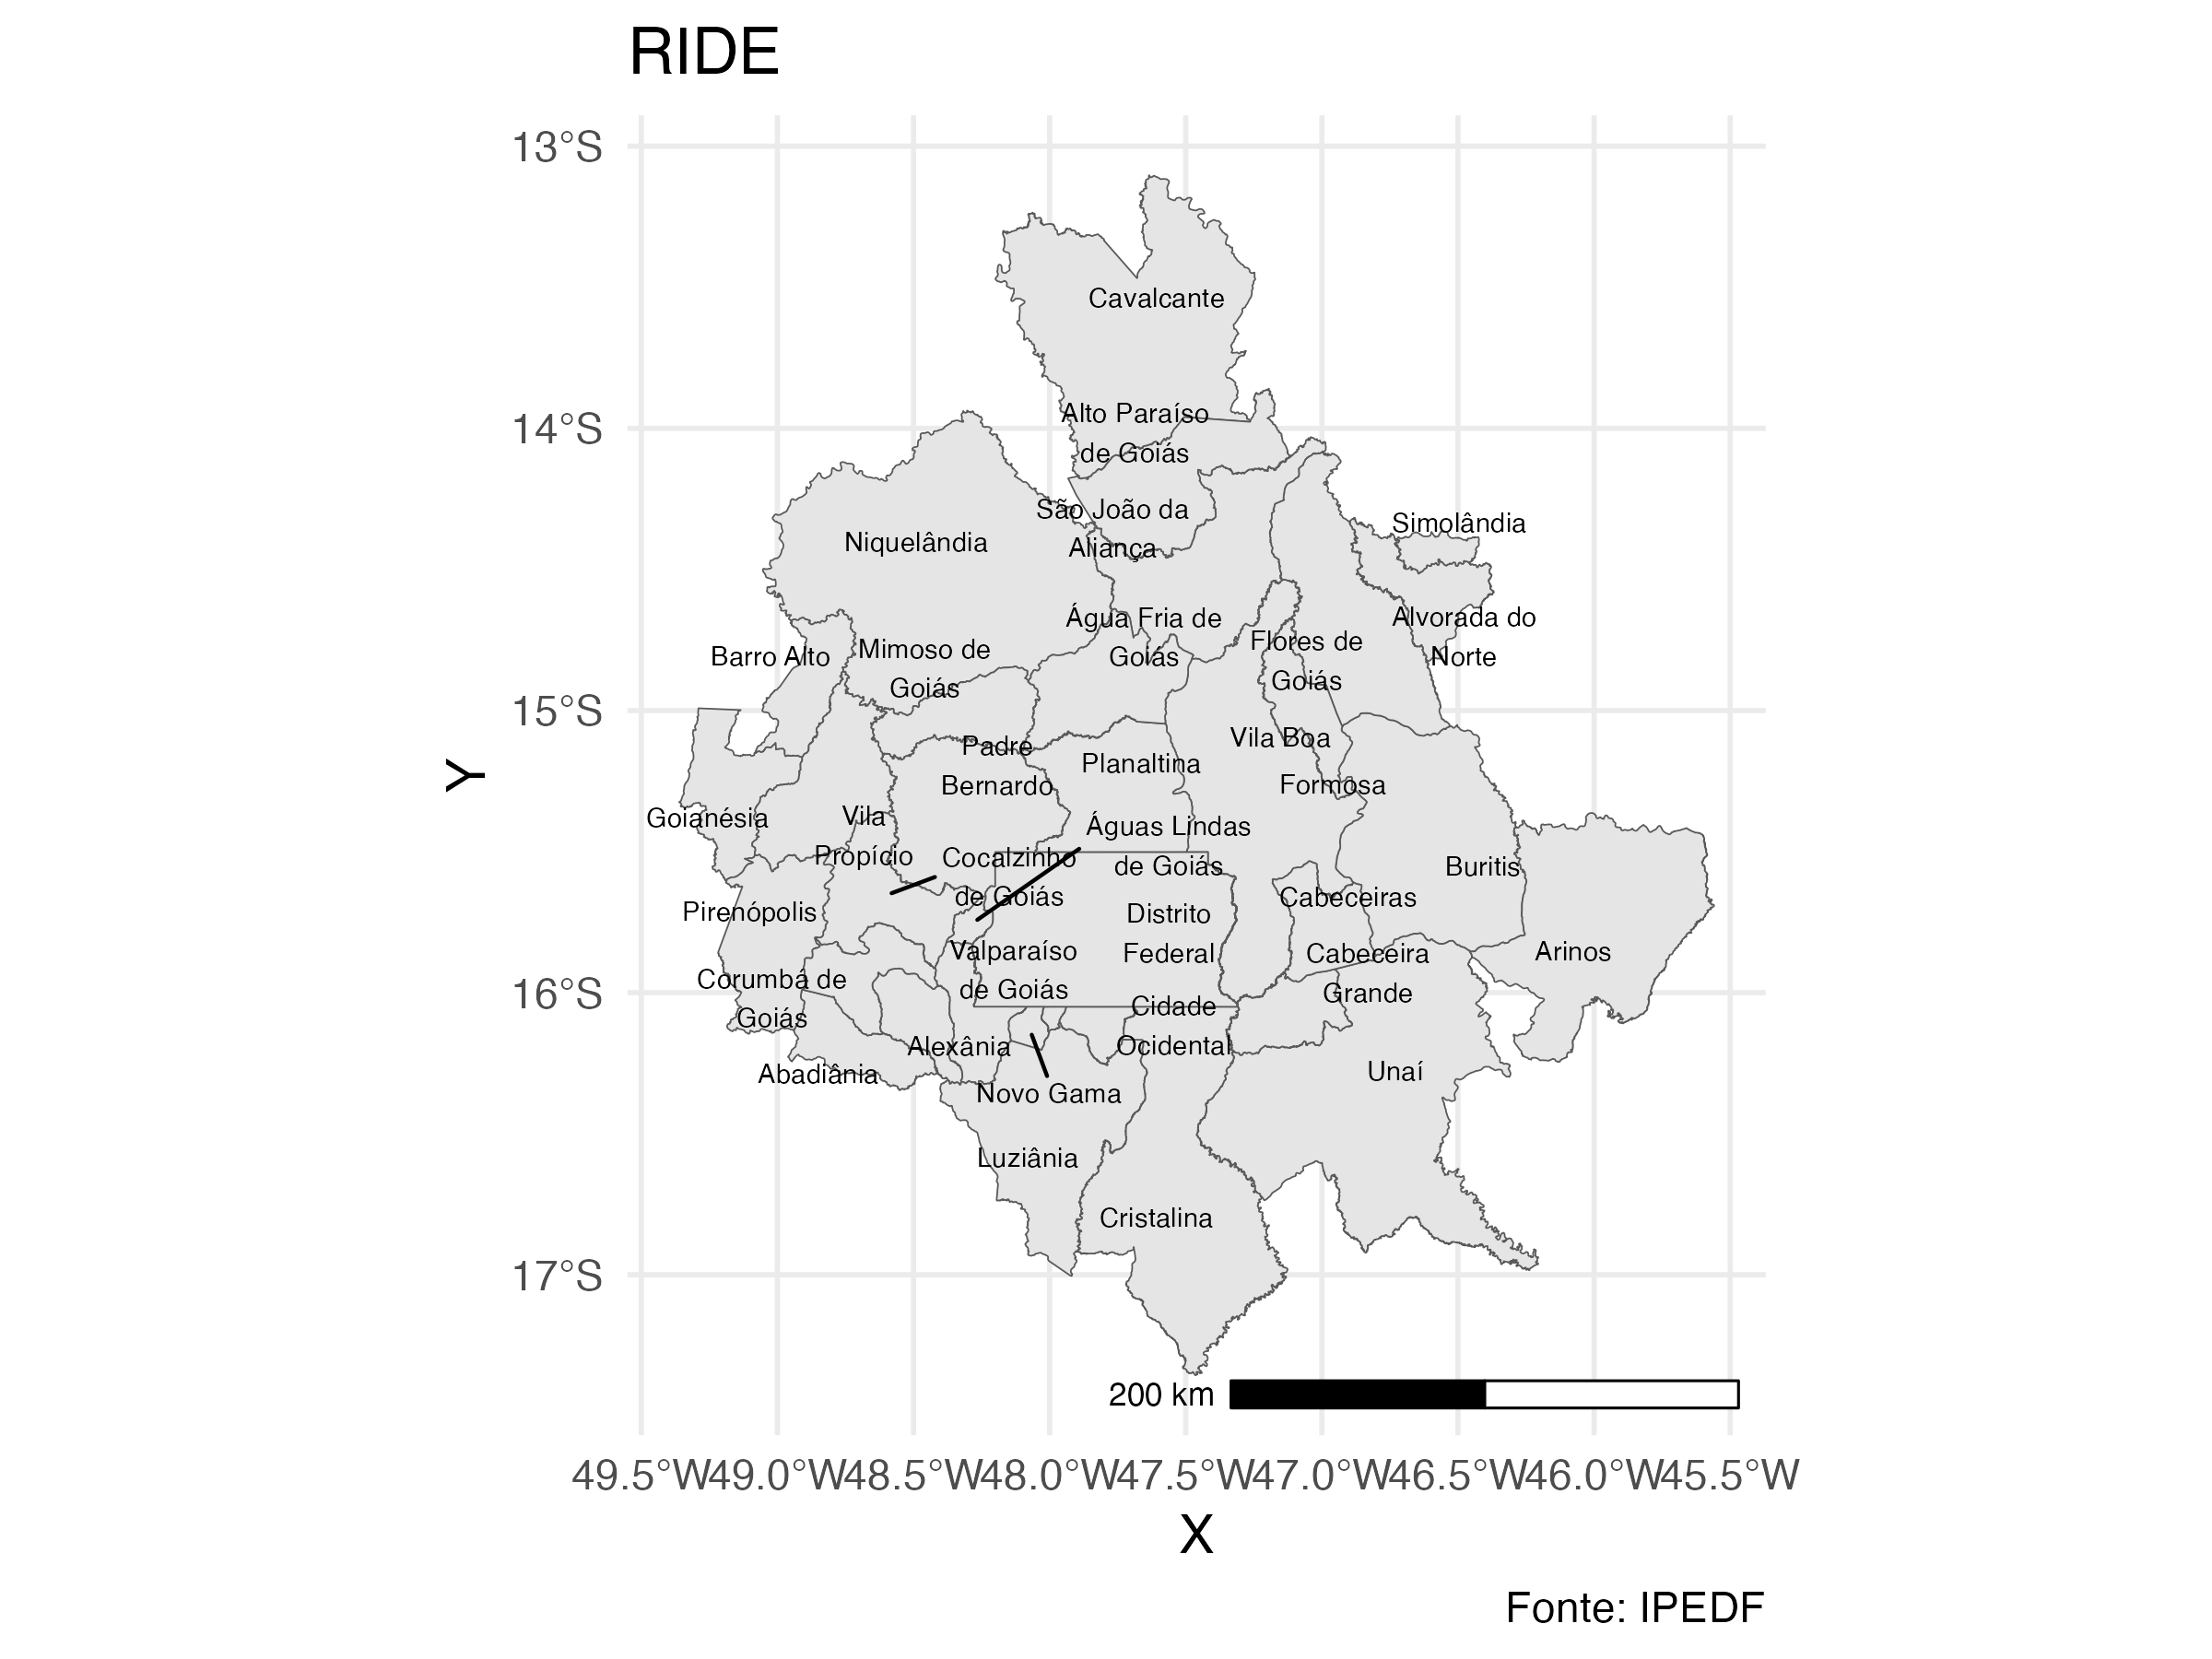

In [ ]:
knitr::include_graphics("ride.png")

In [ ]:
# username <- ""
# password <- ""
# mf_login(credentials = c(username, password))
# 
# 
# roi <- st_as_sf(
#   data.frame(id = "ride_df",
#              geom =  "POLYGON ((-49.36 -17.36, -49.36 -13.10, -45.56 -13.10, -45.56 -17.36, -49.36 -17.36))"),
#   wkt = "geom", crs = 4326
# )
# 
# 
# collection <- "MOD11A1.061" #10:30
# variables <- c("LST_Day_1km")
# time_range <- as.Date(c("2020-10-22", "2020-10-22"))
# 
# urls <- mf_get_url(collection = collection, variables = variables,
#                    roi = roi, time_range = time_range)

In [ ]:
# res <-  mf_download_data(urls)
# 
# 
# rast <- mf_import_data(
#   path = unique(dirname(res$destfile))[1],
#   collection = collection,
#   proj_epsg = 4326)
# 
# df <- as.data.frame(rast, xy = TRUE)
# df$lst_c <- df$LST_Day_1km - 273.15
# 
# # 7) Exportar como CSV
# write.csv(df[, c("x","y","lst_c")], "temperatura_geral.csv", row.names = FALSE)
# 

## Material e Métodos

Para a obtenção dos dados de temperatura utilizados neste trabalho, recorreu-se à plataforma Earthdata, mantida pela NASA em parceria com o Serviço Geológico dos Estados Uniddos (USGS), que disponibiliza produtos de sensoriamento remoto derivados do sensor MODIS (Moderate Resolution Imaging Spectroradiometer), a bordo dos satélites Terra e Aqua \[@wan2002modis; @earthdata\].

Foi utilizada uma coleção diária de temperatura da superfície terrestre (Land Surface Temperature – LST), registrada no período diurno, aproximadamente às 10h30 no horário local, com resolução espacial de 1 km². Essa variável representa a temperatura radiativa da superfície da Terra, estimada a partir da emissão térmica captada pelos sensores MODIS. Os dados são originalmente fornecidos em kelvin e foram convertidos para graus Celsius para facilitar a análise e a interpretação. A data selecionada foi 22 de outubro de 2020, coincidindo com o aniversário da autora e escolhida como eixo temático do estudo.

A área de interesse corresponde à Região Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE-DF), composta pelo Distrito Federal por 34 municípios de seu entorno, sendo 30 localizados no estado de Goiás e 4 em Minas Gerais, conforme estabelecido pela legislação federal vigente. Para delimitar essa região, foi utilizado um polígono geográfico de referência com abrangência compatível com os limites da RIDE. Os dados de temperatura foram então recortados com base nesse polígono, de forma a manter apenas os pontos efetivamente situados dentro da área de estudo.

In [ ]:
df <- read_csv("temperatura_geral.csv")

Rows: 110038 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): x, y, lst_c

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

No total, foram utilizados 181 medições . As coordenadas dos pontos de temperatura foram obtidas tanto em formato geográfico (latitude e longitude) quanto em sistema projetado UTM (Universal Transverse Mercator, zona 23S, SIRGAS 2000), sendo este último utilizado nas análises geoestatísticas por ser mais adequado ao cálculo de distâncias em metros.

In [ ]:
g2 <- ggplot() +
  geom_sf(data = ride_sf, fill = NA, color = "black", linewidth = 0.1) +  # polígono em preto
  geom_sf(data = dados_utm_sf_amostra, aes(color = temp), size = 2) +  # pontos coloridos
  #acrescentar rotulos com nome dos municipios
  
  scale_color_viridis_c(name = "Temperatura (°C)") +
  theme_minimal(base_size=12) +
  labs(
    title = "Pontos de medição\n Temperatura na RIDE-DF",
    caption = "Fonte: Earthdata, NASA"
  )
ggsave("ride_temp_points.png", g2, width = 8, height = 6, dpi = 300)

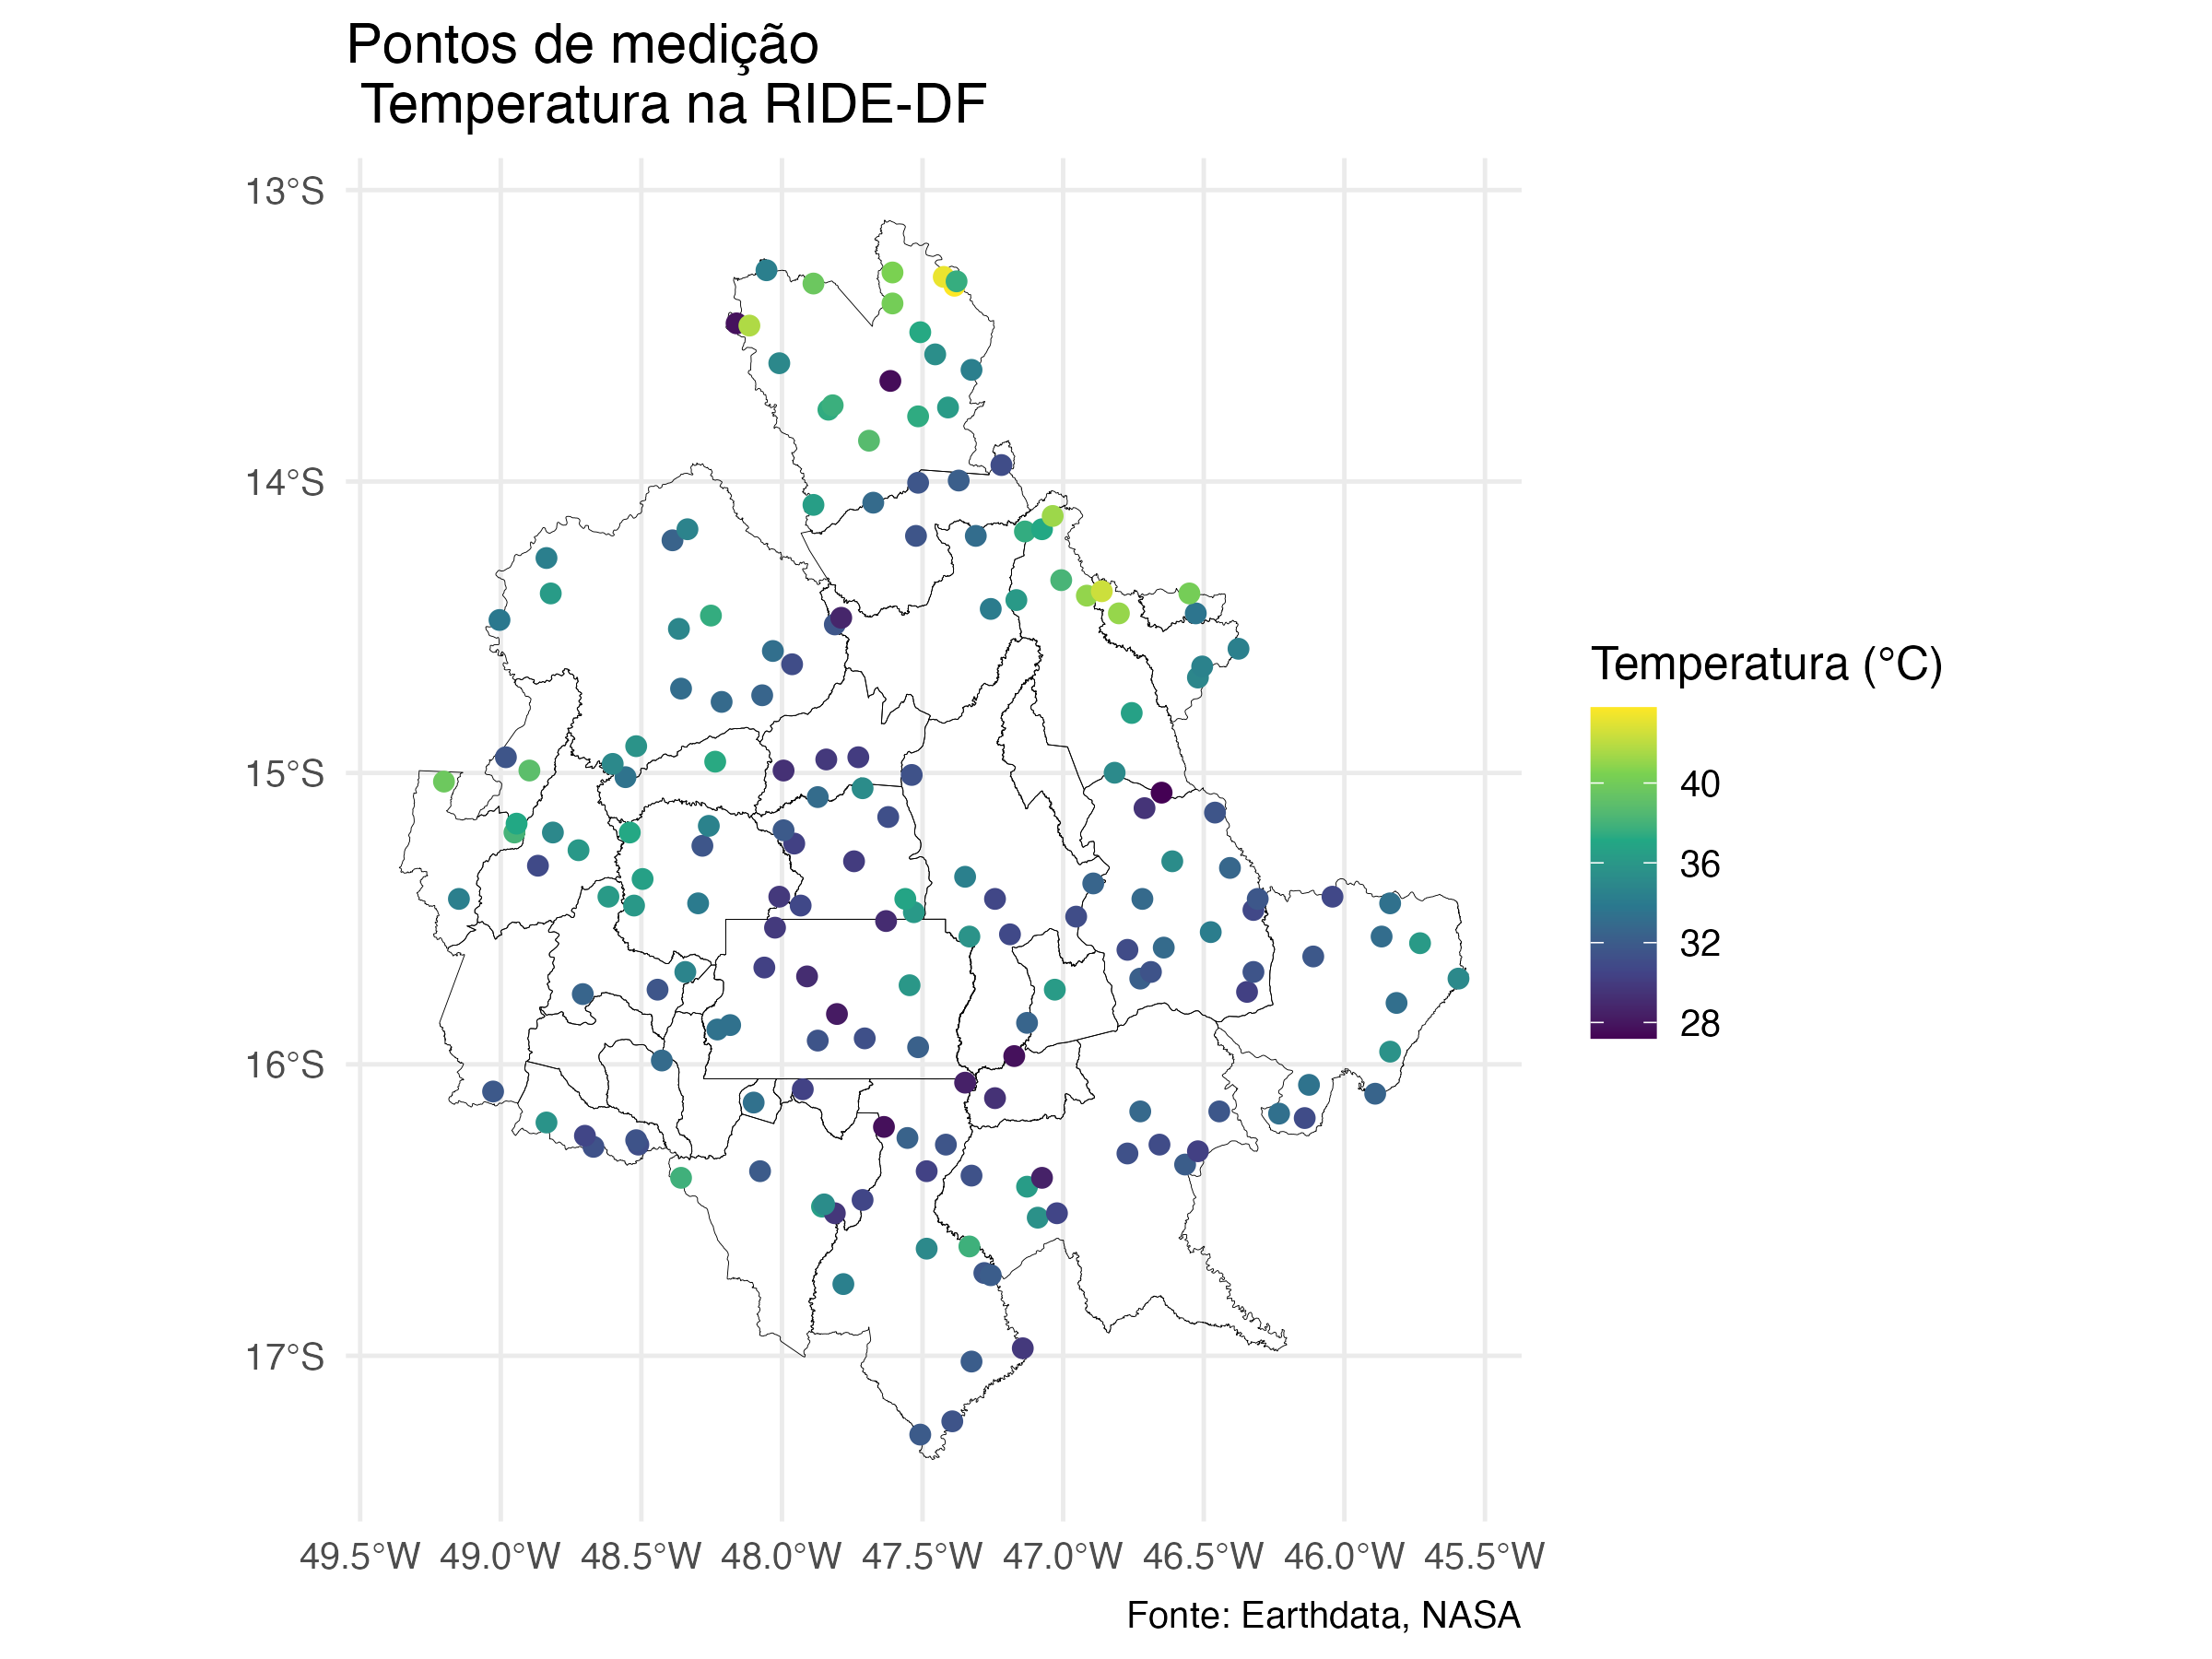

In [ ]:
knitr::include_graphics("ride_temp_points.png")

Com os dados preparados, procedeu-se à aplicação da krigagem ordinária, técnica de interpolação espacial baseada na teoria dos processos estocásticos estacionários, que utiliza a estrutura de autocorrelação espacial da variável observada para gerar estimativas em pontos não amostrados.

## Resultados

A fim de estimar a temperatura da superfície terrestre em locais não amostrados dentro da RIDE-DF, foi realizada a modelagem do variograma empírico com base na amostra dos 181 pontos. Para isso, foram testados diferentes modelos teóricos de variograma, esférico, gaussiano, exponencial e linear, com diferentes valores de sill, range e nugget com o objetivo de avaliar qual estrutura de dependência espacial melhor se ajustava aos dados.

A comparação visual dos ajustes ( @fig-ajuste-variogramas) mostrou que os modelos esférico e exponencial foram capazes de capturar razoavelmente bem a tendência observada no variograma empírico. O modelo gaussiano não se ajustou bem quando os dados atingiam o range e o modelo linear apresentou instabilidades no processo de ajuste, com alerta de singularidade, e foi descartado da análise final. O gráfico resultante mostra a semivariância média dos pares de pontos em função da distância que os separa, evidenciando o grau de dependência espacial da variável.

O modelo exponencial foi selecionado para as análises de krigagem, por apresentar o melhor compromisso entre aderência visual ao variograma empírico, simplicidade de interpretação e estabilidade numérica no ajuste. Conforme discutido por Moraga (2022), esse modelo é especialmente útil quando a correlação espacial decresce suavemente com a distância, o que foi observado nos dados analisados.

Com o modelo exponencial ajustado, foi realizada a krigagem ordinária sobre uma grade regular de pontos com espaçamento de 1 km dentro da área da RIDE. O resultado foi a geração de uma superfície contínua de temperatura estimada, representando a variação espacial da LST em toda a região no dia 22 de outubro de 2020.

In [ ]:
# 1. Calcula variograma
v <- variogram(temp ~ 1, data = dados_utm_sf_amostra)
v$dist <- v$dist / 1000  # converte para km

# 2. Ajusta modelos
fit_sph <- fit.variogram(v, model = vgm(psill = 15, model = "Sph", range = 200, nugget = 3))
fit_gau <- fit.variogram(v, model = vgm(psill = 15, model = "Gau", range = 200, nugget = 3))
fit_exp <- fit.variogram(v, model = vgm(psill = 10, model = "Exp", range = 200, nugget = 2))
fit_lin <- fit.variogram(v, model = vgm(psill = 15, model = "Lin", range = 200, nugget = 3))

Warning in fit.variogram(v, model = vgm(psill = 15, model = "Lin", range = 200,
: singular model in variogram fit

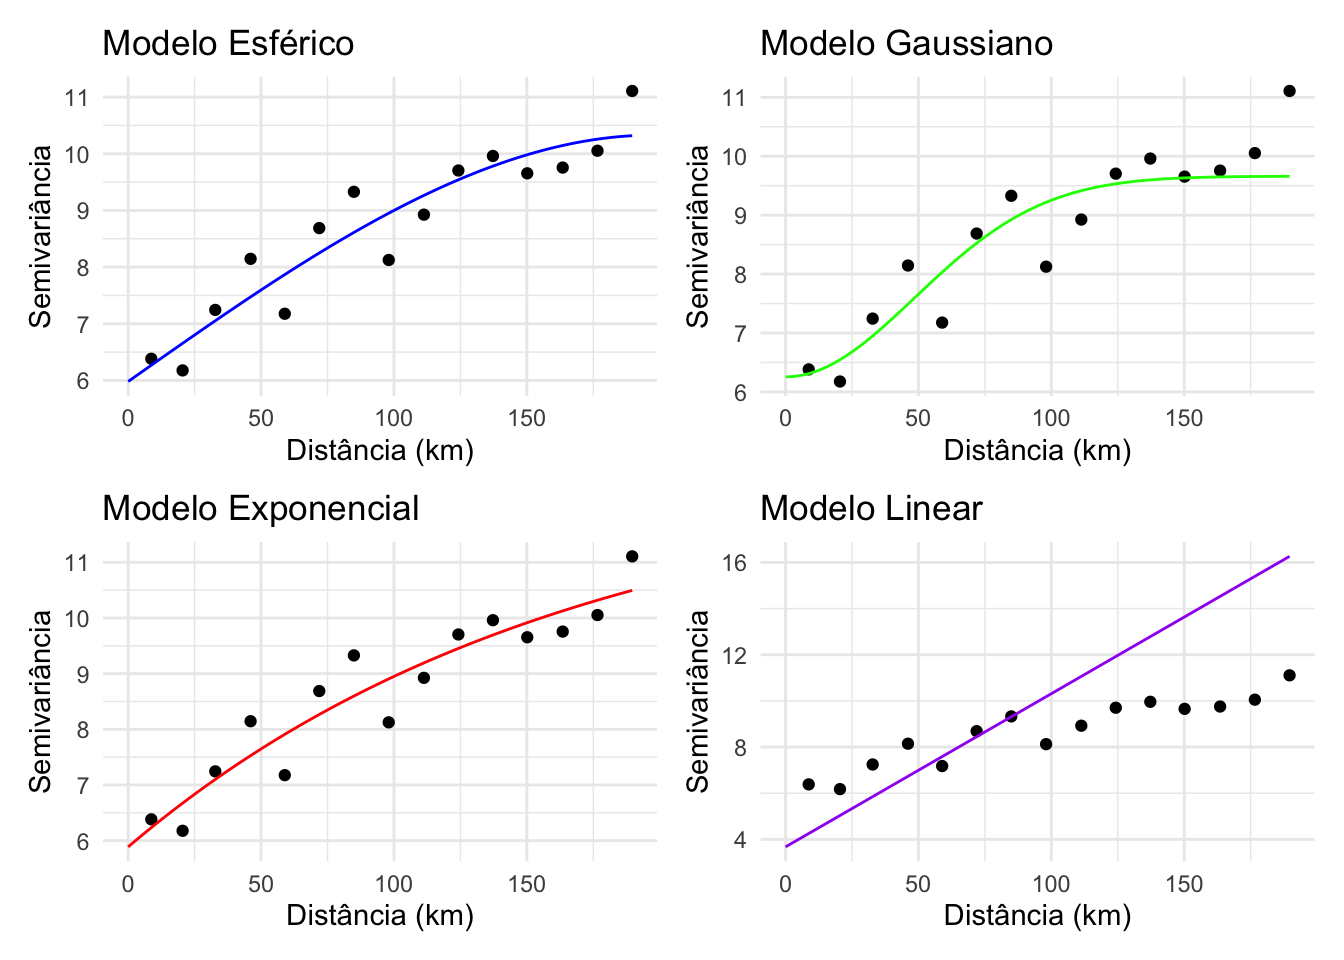

In [ ]:
# 4. Patchwork: 2x2
(g1 | g2) / (g3 | g4)

Na sequência, foi ajustado um modelo teórico exponencial, com parâmetros iniciais definidos para o patamar (sill), efeito pepita (nugget) e alcance (range). O ajuste obteve convergência e mostrou boa aderência visual ao variograma empírico, respeitando a tendência de crescimento rápido da semivariância para pequenas distâncias, característica compatível com esse tipo de modelo.

O modelo ajustado estimou um nugget de aproximadamente 3, indicando uma parcela de variabilidade que não é explicada pela estrutura espacial, possivelmente atribuída a erros de medição, microvariações locais ou ruído do processo. O sill (patamar da variância total) foi estimado em torno de 15, valor que representa o nível de estabilização da semivariância para distâncias maiores. Já o range foi estimado em cerca de 150 km, sugerindo que pontos distantes até essa ordem de magnitude ainda apresentam correlação espacial significativa.

Esses valores são consistentes com um cenário em que a temperatura de superfície apresenta autocorrelação espacial de média escala, com variação gradual ao longo do território da RIDE, o que justifica o uso da krigagem como interpolador.

In [ ]:
# Criar grade regular mais esparsa (5 km em vez de 1 km)
vc <- variogram(temp ~ 1, dados_utm_sf_amostra)
vinitial <- vgm(psill = 15, model = "Exp", range = 150000, nugget = 3)
fv <- fit.variogram(vc, model = vinitial)
ride_utm <- st_transform(ride_sf, 31983)

# 🔳 Criar grade regular de pontos dentro da RIDE
grid <- st_make_grid(ride_utm, cellsize = 1000, what = "centers")
grid_sf <- st_sf(geometry = grid, crs = st_crs(ride_utm))
grid_sf <- grid_sf[ride_utm, ]

# 🤖 Krigagem
k <- gstat(formula = temp ~ 1, data = dados_utm_sf_amostra, model = fv)
kpred <- predict(k, newdata = grid_sf)

[using ordinary kriging]

Para a aplicação da krigagem, foi construída uma grade regular de predição sobre a área da RIDE, com espaçamento de 2.500 metros entre os pontos centrais. Esse valor foi escolhido com o objetivo de manter boa resolução espacial ao mesmo tempo em que se preserva a legibilidade visual da trama da grade. Os pontos da grade foram filtrados para incluir apenas aqueles contidos dentro dos limites geográficos da região de estudo.

A @fig-grade-krigagem apresenta os pontos da grade de predição (em vermelho) distribuídos de forma homogênea ao longo da RIDE, além dos pontos amostrados utilizados para o ajuste da krigagem. Estes pontos amostrados estão representados por marcadores pretos, acompanhados dos respectivos valores de temperatura da superfície terrestre (em graus Celsius).

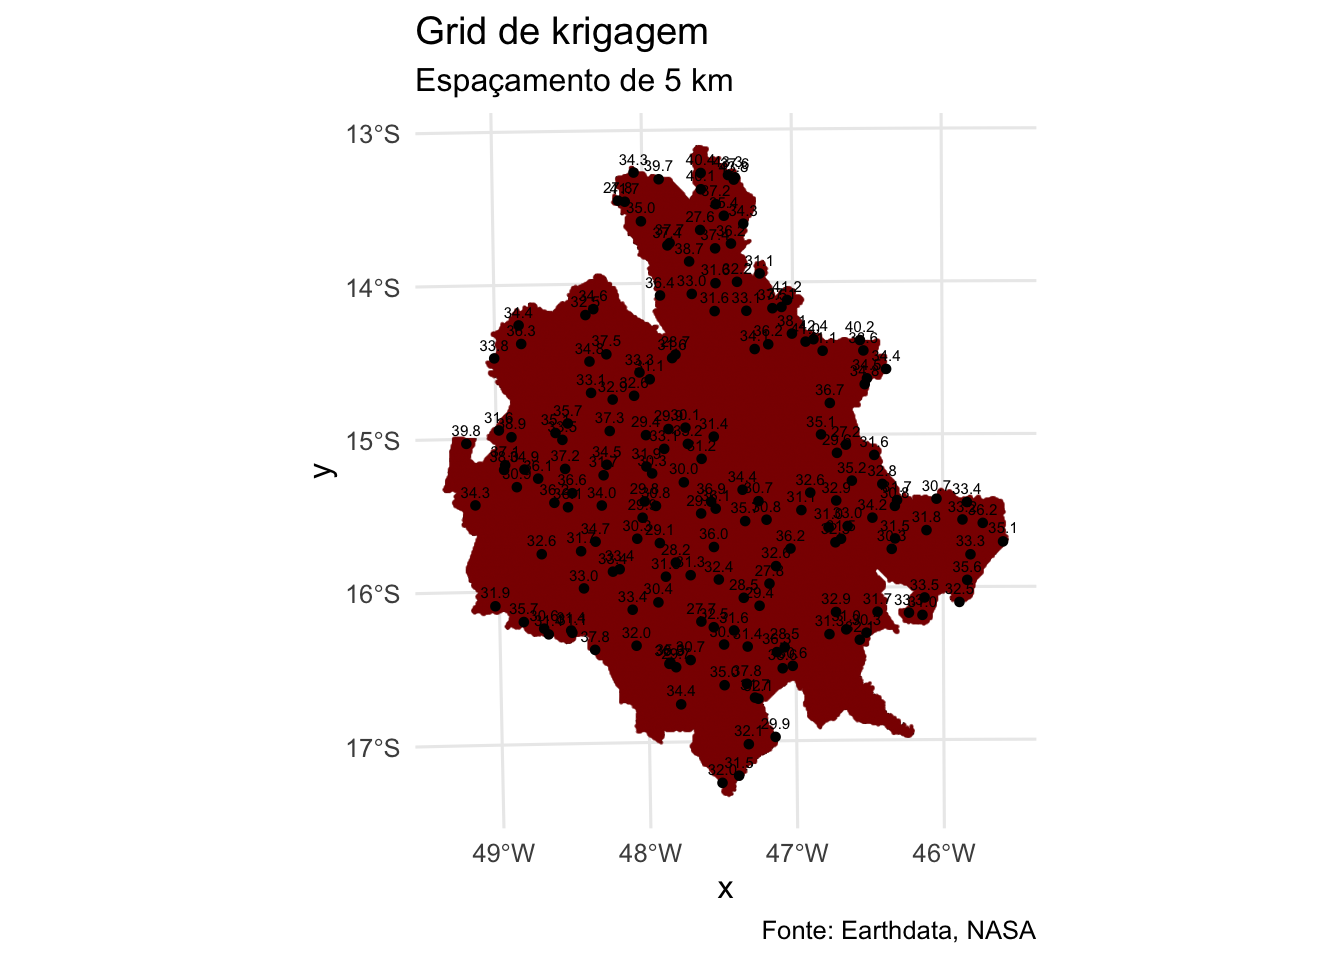

In [ ]:
dados_lab <- dados_utm_sf_amostra %>%
  mutate(temp_label = sprintf("%.1f", temp))
# Gráfico
ggplot() +
  geom_sf(data = ride_utm, fill = NA, color = "black") +  # contorno da RIDE
  geom_sf(data = grid_sf, color = "darkred", size = 0.1, alpha = 0.6) +  # pontos do grid
  geom_sf(data = dados_lab, size = 1.2, shape = 21, fill = "black") +  # pontos amostrados pretos
  geom_sf_text(data = dados_lab, aes(label = temp_label), size = 2, nudge_y = 10000) +  # temperatura como texto
  theme_minimal(base_size=12) +
  labs(
    title = "Grid de krigagem ",
    subtitle = "Espaçamento de 5 km",
    caption = "Fonte: Earthdata, NASA"
  )

In [ ]:
dados_utm_sf_amostra <- dados_utm_sf_amostra %>%
  mutate(
    x = st_coordinates(geometry)[,1],
    y = st_coordinates(geometry)[,2]
  )
grid_sf <- grid_sf %>%
  mutate(
    x = st_coordinates(geometry)[,1],
    y = st_coordinates(geometry)[,2]
  )
# Krigagem com tendência espacial (universal)
k_uni <- gstat(
  formula = temp ~ x + y,
  data = dados_utm_sf_amostra,
  model = fv
)

# Predição sobre a grade
kpred_uni <- predict(k_uni, newdata = grid_sf)

[using universal kriging]

Além da krigagem ordinária, foi também aplicada a krigagem universal, que considera a presença de uma tendência espacial global na média da variável de interesse. Nesse caso, admitiu-se que a temperatura da superfície terrestre poderia variar de forma sistemática ao longo do espaço, e essa tendência foi modelada por meio das próprias coordenadas UTM (x e y) dos pontos de amostragem.

O modelo ajustado incorporou essa estrutura, permitindo estimar a média da temperatura como uma função linear das coordenadas espaciais, enquanto a dependência residual foi tratada pela estrutura variográfica previamente ajustada.

Apesar da incorporação dessa estrutura adicional no modelo, a comparação visual entre os mapas resultantes da krigagem ordinária e da krigagem universal ( @fig-krigagem-comparacao) não revelou diferenças perceptíveis na superfície interpolada. Ambas as abordagens produziram mapas semelhantes, com padrões espaciais suaves e coerentes com a distribuição dos dados observados.

Essa ausência de distinção visual pode ser explicada por características da própria área de estudo: a RIDE-DF está localizada em uma região de relevo relativamente plano e contínuo, com uma distribuição espacial de temperatura que, ao menos na data considerada, não apresenta gradientes acentuados ou tendências marcantes ao longo das coordenadas geográficas. Em contextos assim, a contribuição de uma estrutura de tendência global tende a ser pequena, fazendo com que a krigagem universal e a ordinária produzam resultados semelhantes.

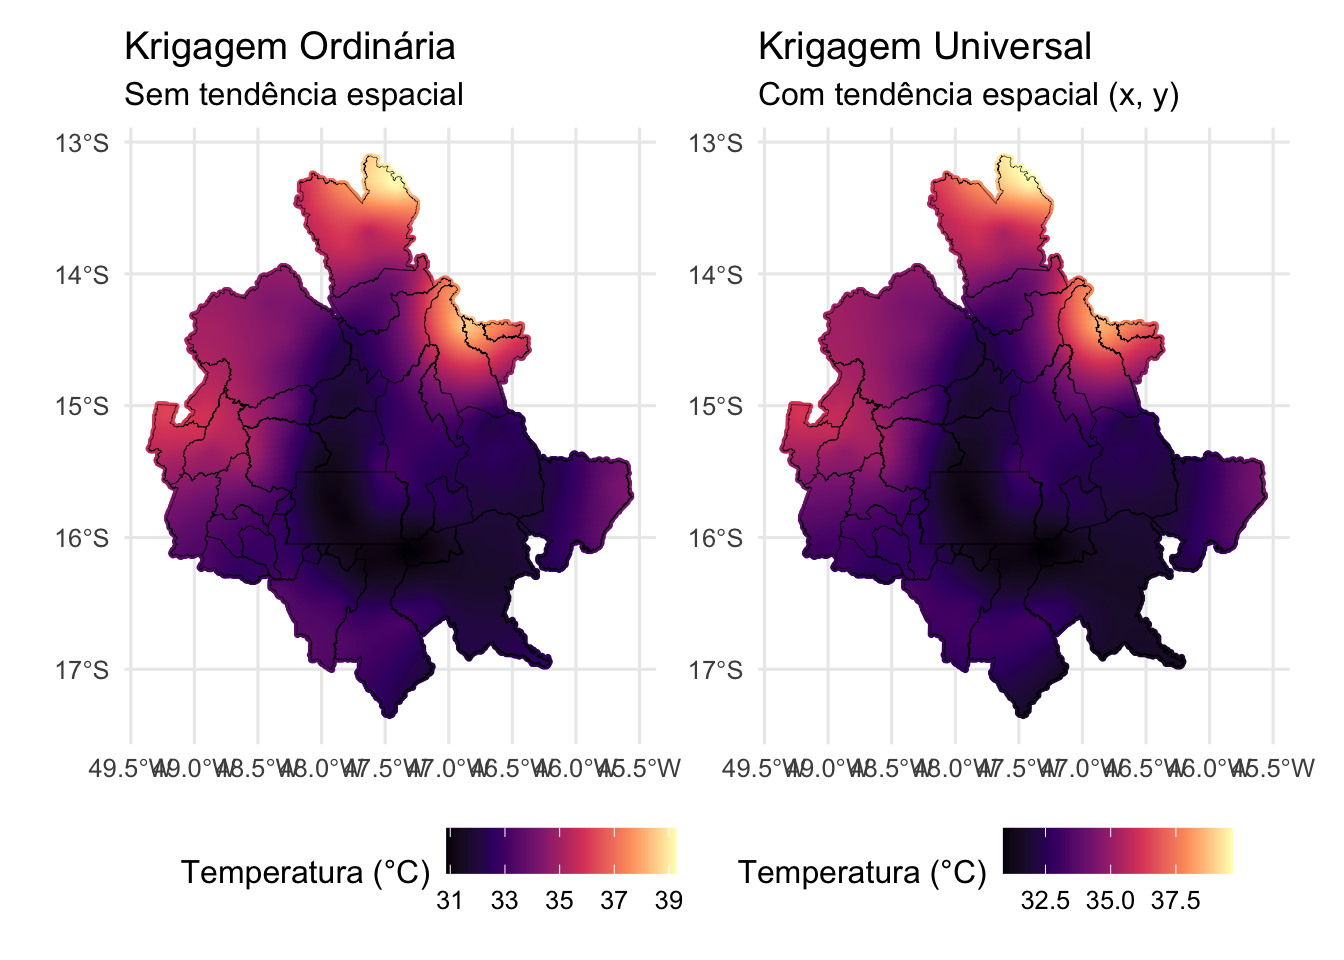

In [ ]:
# Gráfico da krigagem ordinária
p_ordinaria <- ggplot() +
  geom_sf(data = kpred_latlon, aes(color = var1.pred), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Temperatura (°C)", option = "magma") +
  theme_minimal(base_size=12) +
  labs(title = "Krigagem Ordinária", subtitle = "Sem tendência espacial")

# Gráfico da krigagem universal
p_universal <- ggplot() +
  geom_sf(data = st_transform(kpred_uni_sf, 4326), aes(color = var1.pred), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Temperatura (°C)", option = "magma") +
  theme_minimal(base_size=12) +
  labs(title = "Krigagem Universal", subtitle = "Com tendência espacial (x, y)")

# Patchwork lado a lado
p_ordinaria + p_universal + plot_layout(guides = "collect") & theme(legend.position = "bottom")

Avaliando a superficie de erros vemos que os erros sao menores perto dos posntos amostrados como esperado lalala

In [ ]:
# Adicione a coluna de variância aos objetos sf
kpred_latlon$method <- "Ordinária"
kpred_latlon$var <- kpred$var1.var

kpred_uni_latlon <- st_transform(kpred_uni_sf, 4326)
kpred_uni_latlon$method <- "Universal"
kpred_uni_latlon$var <- kpred_uni$var1.var

# Junta ambos para facilitar o plot com facetas ou patchwork
erros_comb <- rbind(kpred_latlon, kpred_uni_latlon)

Avaliando a superfície do erro padrão das predições por krigagem (@fig-superficie-erro-padrao), observa-se que os menores valores de incerteza concentram-se nas regiões próximas aos pontos de amostragem, como era esperado. Nessas áreas, a densidade de informação observada permite ao modelo realizar predições mais confiáveis, reduzindo a variância associada. Por outro lado, nas porções mais periféricas da RIDE, especialmente em trechos do norte, nordeste e extremo oeste —, os valores do erro padrão se elevam, refletindo a maior distância em relação aos dados utilizados no ajuste da krigagem.

Esse comportamento é característico do método geoestatístico adotado, uma vez que a precisão da predição decai com o aumento da distância em relação aos pontos observados. Além disso, nota-se que tanto a krigagem ordinária quanto a universal apresentaram padrões similares de erro padrão, reforçando a conclusão de que a inclusão da tendência espacial não resultou em ganhos substantivos de acurácia no presente contexto.

In [ ]:
# Para krigagem ordinária
kpred_latlon$erro_padrao <- sqrt(kpred$var1.var)

# Para krigagem universal
kpred_uni_latlon$erro_padrao <- sqrt(kpred_uni$var1.var)

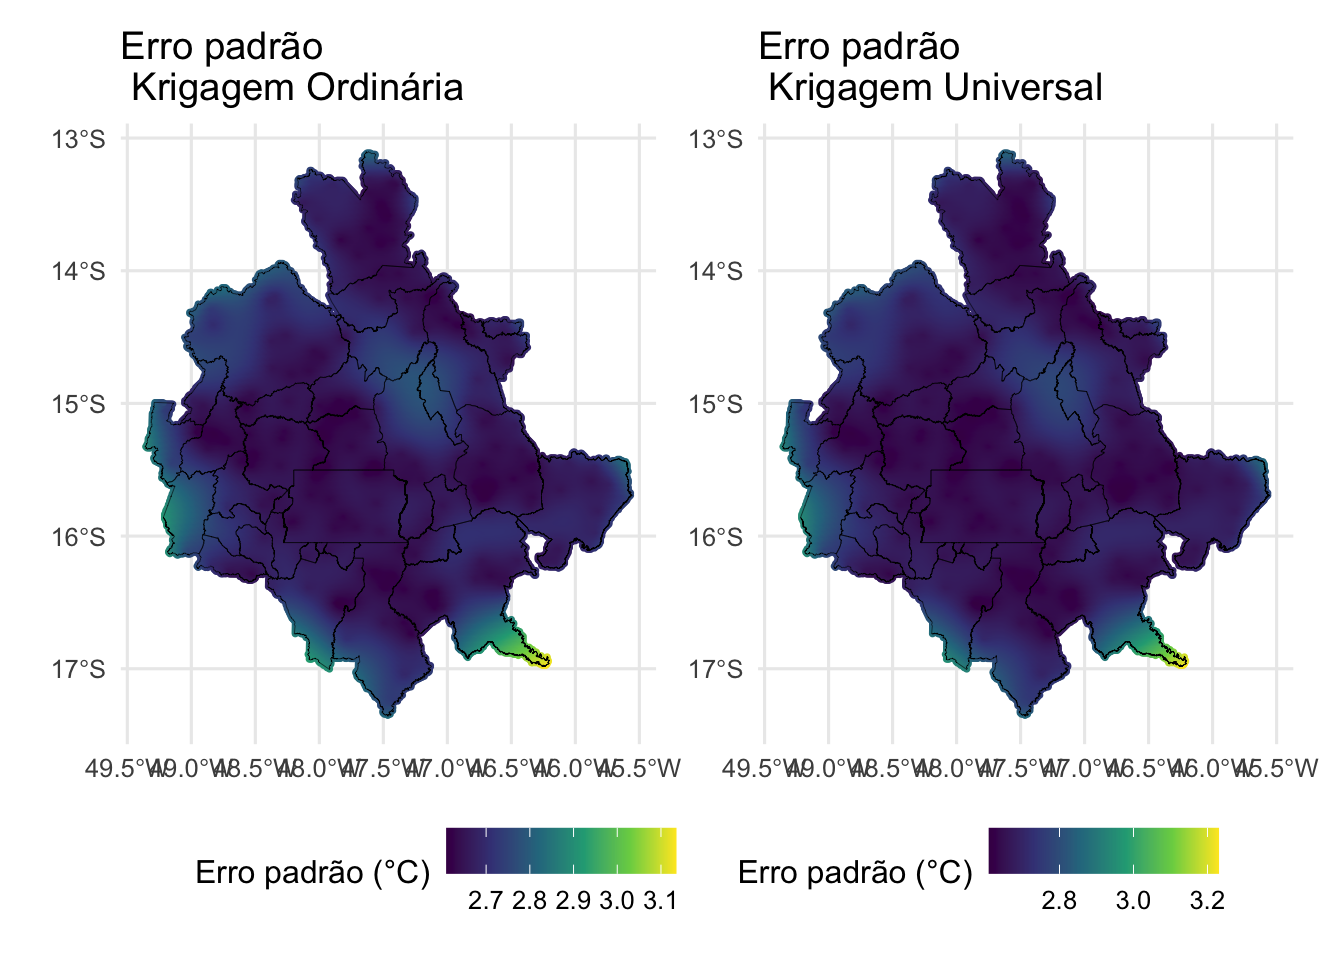

In [ ]:
# Erro padrão ordinário
g1 <- ggplot() +
  geom_sf(data = kpred_latlon, aes(color = erro_padrao), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Erro padrão (°C)") +
  theme_minimal(base_size=12) +
  labs(title = "Erro padrão\n Krigagem Ordinária")

# Erro padrão universal
g2 <- ggplot() +
  geom_sf(data = kpred_uni_latlon, aes(color = erro_padrao), size = 0.6) +
  geom_sf(data = ride_latlon, fill = NA, color = "black", linewidth = 0.1) +
  scale_color_viridis_c(name = "Erro padrão (°C)") +
  theme_minimal(base_size=12) +
  labs(title = "Erro padrão\n Krigagem Universal")

# Patchwork com legenda única
g1 + g2 + plot_layout(guides = "collect") & theme(legend.position = "bottom")

## Conclusões

A superfície de temperatura estimada pela krigagem revela padrões espaciais coerentes com as características geográficas e ambientais da Região Integrada de Desenvolvimento do Distrito Federal e Entorno (RIDE-DF). Observa-se uma tendência de temperaturas mais elevadas nas porções norte e oeste da região, especialmente em municípios como Cavalcante, Alto Paraíso de Goiás, Niquelândia e Barro Alto. Essas localidades são marcadas por altitudes relativamente mais baixas, presença predominante de áreas abertas, pastagens e agricultura extensiva, e menor cobertura florestal, fatores que favorecem maior absorção de radiação solar e aquecimento da superfície terrestre (Moraga, 2022). E eu também por acaso já notei que Cavalcante costuma ser bem mais quente que Brasília quando vou la acambar no Parque Nacional da Chapada dos Veadeiros.

Em contraste, as temperaturas mais amenas concentram-se na porção sul da RIDE, em municípios como Cristalina, Luziânia, Cidade Ocidental e Novo Gama, além do centro-leste da região, abrangendo o Distrito Federal. Essa distribuição se alinha à topografia mais elevada do Planalto Central, onde altitudes frequentemente superam os 1.000 metros, contribuindo para uma moderação térmica natural. A maior presença de manchas urbanas contínuas com arborização significativa, aliada a áreas de proteção ambiental como o Parque Nacional de Brasília, também pode resultar em temperaturas de superfície mais baixas, configurando, em alguns trechos, o fenômeno conhecido como “ilha de frescor urbano”

Os dados utilizados referem-se à temperatura da superfície terrestre (Land Surface Temperature – LST) captada via sensoriamento remoto no período diurno (~10h30), sendo sensíveis à cobertura e ao uso do solo, à umidade superficial e ao relevo. Como a data de referência é 22 de outubro de 2020, dia do aniversário da autora, e também um dos mais quentes daquele ano na região —, a escolha do recorte temporal não foi apenas afetiva, mas também climática. Trata-se de um momento de transição entre a estação seca e o início da estação chuvosa no Centro-Oeste, período marcado por altos índices de radiação solar e baixa umidade do solo.

Curiosamente, embora a memória térmica da autora guarde a Asa Norte como um forno reformando sem ar-condicionado, os dados mostram que havia regiões significativamente mais quentes na RIDE naquele dia. Assim, o sofrimento era real, mas não estava sozinho: a superfície do Planalto queimava de forma coletiva

## Referências